In [79]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [80]:

app = Flask(__name__)

In [81]:
playstore = pd.read_csv("data/googleplaystore.csv")

In [82]:
playstore.drop_duplicates(subset='App', keep = "first" , inplace = True)

In [83]:
playstore.drop([10472], inplace=True)

In [84]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [85]:
playstore.Category = playstore['Category'].astype('category')

In [86]:
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace(',', ''))
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace('+', ''))




In [87]:
playstore.Installs = playstore['Installs'].astype('int64')

In [88]:
playstore['Price'] = playstore['Price'].apply(lambda x: x.replace('$',''))

In [89]:
playstore.Price = playstore['Price'].astype('float64')

In [90]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [91]:
# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer
playstore[['Reviews', 'Size','Installs']] = playstore[['Reviews', 'Size','Installs']].astype('int64') 

In [92]:
category_crosstab = pd.crosstab(
    index=playstore['Category'],
    columns=['Total'])

In [93]:
 category_crosstab.groupby('Category').sum().sort_values(by = 'Total', ascending = False)

col_0,Total
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [94]:
top_category = category_crosstab.groupby('Category').sum().sort_values(by = 'Total', ascending = False).reset_index()

In [95]:
top_category.Category[0]

'FAMILY'

In [96]:
top_category.Total[0]

1832

In [97]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [98]:
playstore.groupby(['Category','App']).agg({
                  'Reviews' : 'sum',
                  'Rating' : 'mean'
                }).sort_values(by = 'Reviews', ascending = False).head(10)

,,Reviews,Rating
Category,App,,
SOCIAL,Facebook,78158306.0,4.1
COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
SOCIAL,Instagram,66577313.0,4.5
COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
GAME,Clash of Clans,44891723.0,4.6
TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
GAME,Subway Surfers,27722264.0,4.5
VIDEO_PLAYERS,YouTube,25655305.0,4.3
TOOLS,"Security Master - Antivirus, VPN, AppLock, Booster",24900999.0,4.7


In [99]:
    cat_order = playstore.groupby(['Category']).agg({
                 'Category':'count',
        }).rename({'Category':'Total'}, axis=1).sort_values(by = 'Category', ascending = False).reset_index()

In [102]:
df2 = playstore.copy()

<BarContainer object of 5 artists>

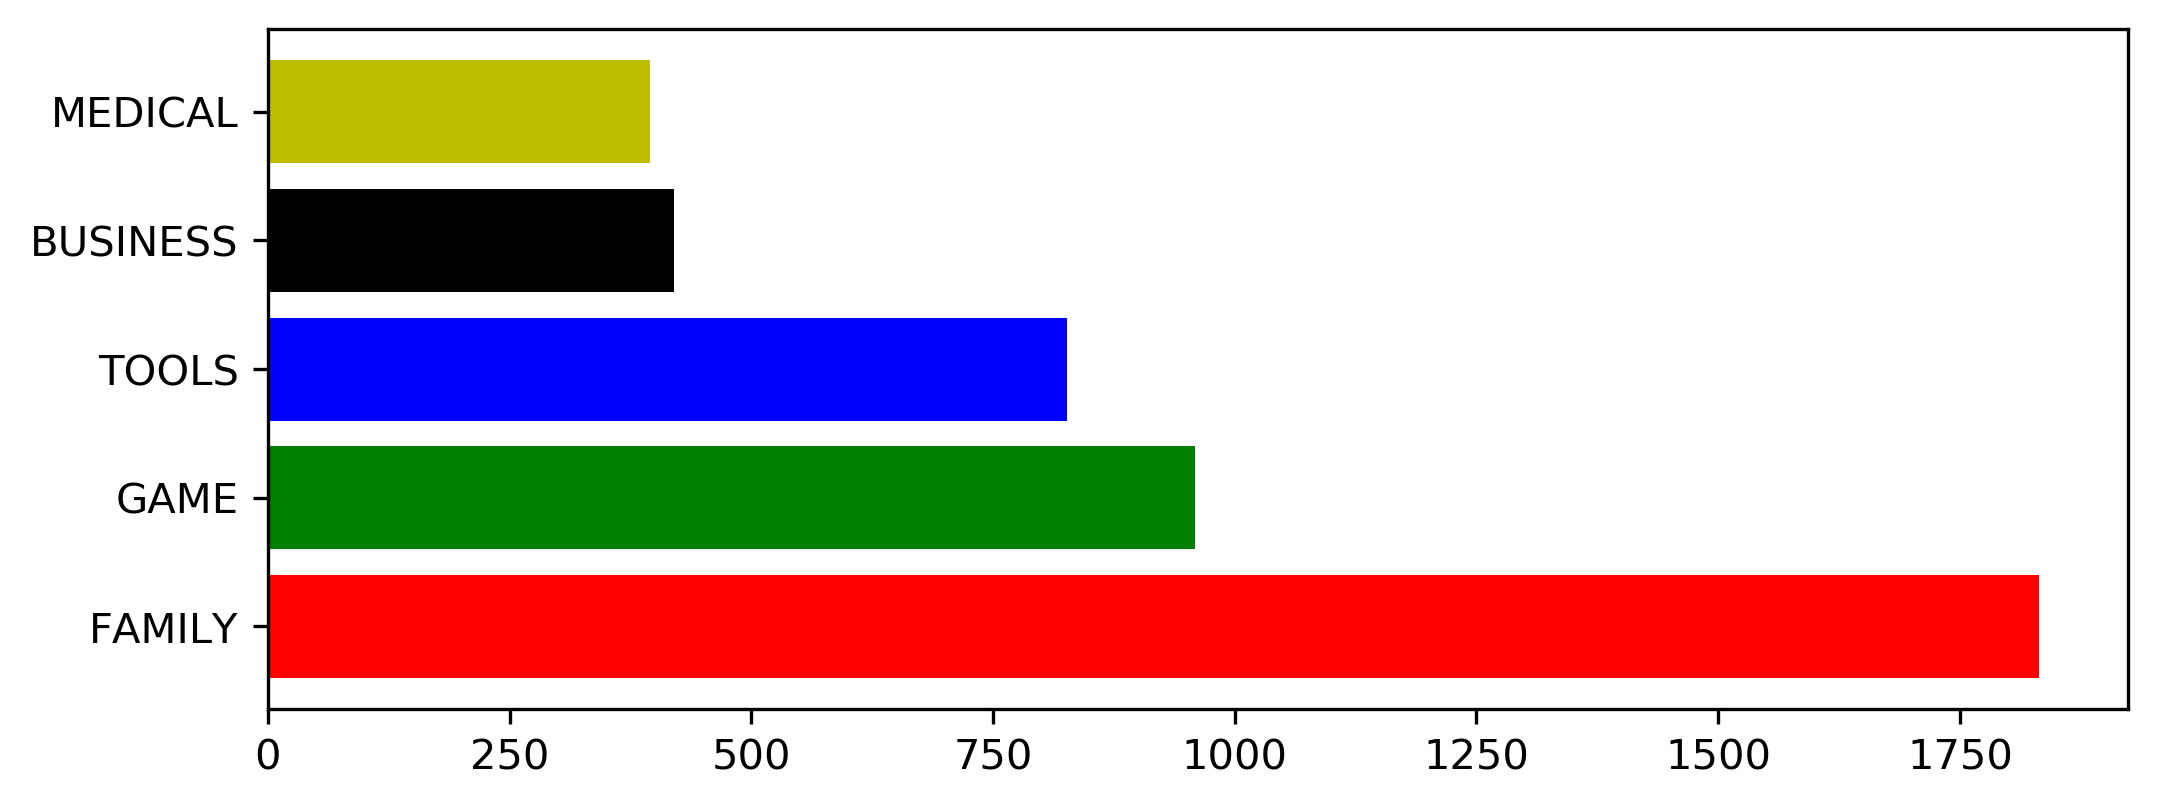

In [110]:
cat_order = playstore.groupby(['Category']).agg({
              'Category':'count',
    }).rename({'Category':'Total'}, axis=1).sort_values(by = 'Total', ascending = False).head().reset_index()
X = cat_order['Category']
Y = cat_order['Total']
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(X,Y, color=my_colors)


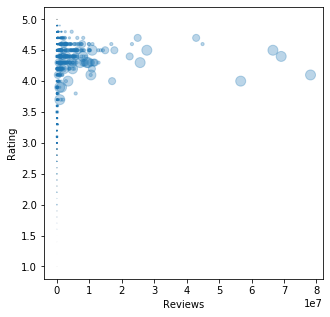

In [105]:
    X = df2['Reviews'].values
    Y = df2['Rating'].values
    area_size = playstore['Installs'].values/10000000
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.scatter(x=X,y=Y, s=area_size, alpha=0.3)
    plt.xlabel('Reviews')
    plt.ylabel('Rating')
    plt.show()

Text(0, 0.5, 'Frequency')

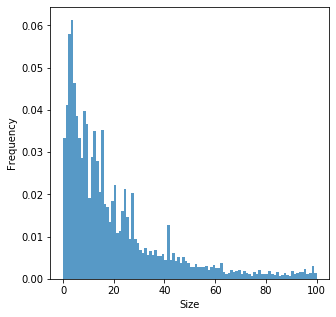

In [161]:
    ## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
    X=(df2['Size']/1000000).values
    num_bins = 100
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(X, num_bins,density=True, alpha=0.75)
    plt.xlabel('Size')
    plt.ylabel('Frequency')

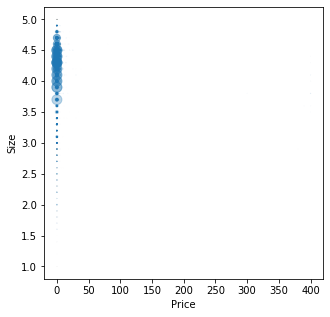

In [131]:
    X = df2['Price'].values
    Y = df2['Rating'].values
    area_size = playstore['Installs'].values/10000000
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.scatter(x=X,y=Y, s=area_size, alpha=0.3)
    plt.xlabel('Price')
    plt.ylabel('Size')
    plt.show()

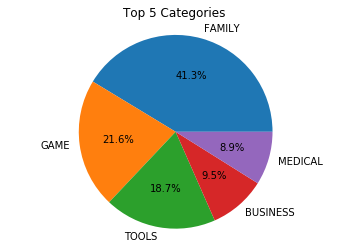

In [164]:
my_data = [1832,959,827,420,395]
my_labels = 'FAMILY','GAME','TOOLS','BUSINESS','MEDICAL'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Top 5 Categories')
plt.axis('equal')
plt.savefig("piechart.png", bbox_inches = 'tight')

C:\Users\Brian Santoso\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Brian Santoso\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


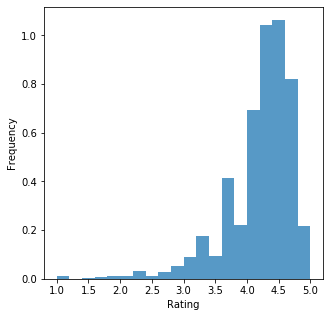

In [167]:
    X=df2['Rating'].values
    num_bins = 20
    fig = plt.figure(figsize=(5,5))
    fig.add_subplot()
    plt.hist(X, num_bins,density=True, alpha=0.75)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.savefig('histrat.png',bbox_inches = "tight")